# Time Series Analysis
---
## 课程大纲

借助 Pandas，我们可以针对 dataframe 计算各种统计结果：

    全局统计值：mean、median、std、sum 等等 [更多信息]
    滚动统计值：rolling_mean、rolling_std 等等 [更多信息]

你将使用这些函数分析一段时间的股票变化情况。

具体而言，你将计算：

    布林带：量化股价距离某个标准值的偏移量。
    每日回报：股价的每日变化。


## Global Statistics


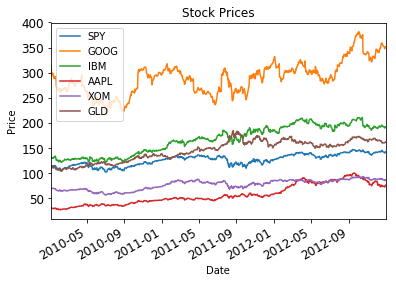

SPY     126.396777
GOOG    289.274140
IBM     166.380238
AAPL     57.071205
XOM      77.054682
GLD     145.029775
dtype: float64
SPY     127.909999
GOOG    290.766358
IBM     168.909996
AAPL     50.949286
XOM      80.090000
GLD     150.294998
dtype: float64
SPY     11.237866
GOOG    32.920252
IBM     27.937249
AAPL    19.936158
XOM      9.831363
GLD     20.897316
dtype: float64
SPY      95303.170033
GOOG    218112.701900
IBM     125450.699780
AAPL     43031.688536
XOM      58099.230017
GLD     109352.450110
dtype: float64


In [2]:
%matplotlib inline
from utils import *
# Define date range
start_date ='2010-01-01'
end_date = '2012-12-31' 
dates = pd.date_range(start_date,end_date)
symbols = ['GOOG', 'IBM', 'AAPL', 'XOM','GLD']
data = get_data(symbols,dates)
plot_data(data)

print(data.mean())
print(data.median())
print(data.std())
print(data.sum())

## Rolling Statistics


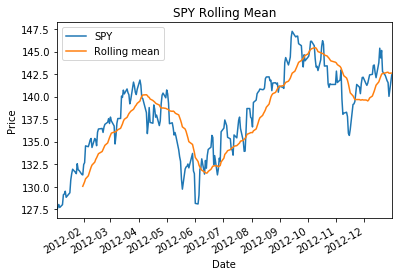

In [5]:
from utils import *
start_date ='2012-01-01'
end_date = '2012-12-31' 
dates = pd.date_range(start_date,end_date)

symbols = ['SPY']
data = get_data(symbols,dates)
plt.figure()
ax = data['SPY'].plot(title='SPY Rolling Mean',label="SPY")

rm_spy = data['SPY'].rolling(window=20).mean()
rm_spy.plot(label='Rolling mean', ax=ax)

ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()


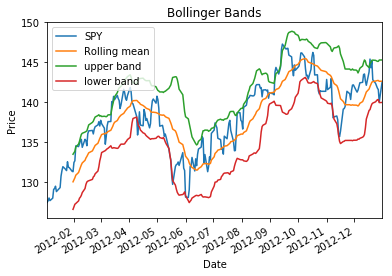

In [3]:
# Read data
dates = pd.date_range('2012-01-01', '2012-12-31')
symbols = ['SPY']
df = get_data(symbols, dates)

# Compute Bollinger Bands
# 1. Compute rolling mean
rm_SPY = get_rolling_mean(df['SPY'], window=20)

# 2. Compute rolling standard deviation
rstd_SPY = get_rolling_std(df['SPY'], window=20)

# 3. Compute upper and lower bands
upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)

# Plot raw SPY values, rolling mean and Bollinger Bands
ax = df['SPY'].plot(title="Bollinger Bands", label='SPY')
rm_SPY.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

# Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()

## Daily Returns


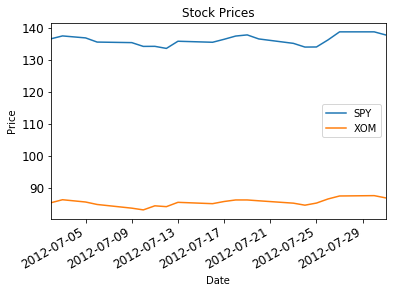

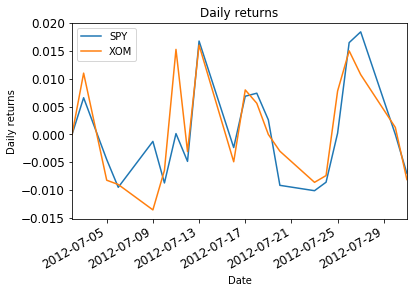

In [4]:
# Read data
dates = pd.date_range('2012-07-01', '2012-07-31')  # one month only
symbols = ['SPY','XOM']
df = get_data(symbols, dates)
plot_data(df)

# Compute daily returns
daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title="Daily returns", y_label="Daily returns")


## Cumulative Returns


SPY    136.509995
XOM     85.339996
Name: 2012-07-02 00:00:00, dtype: float64


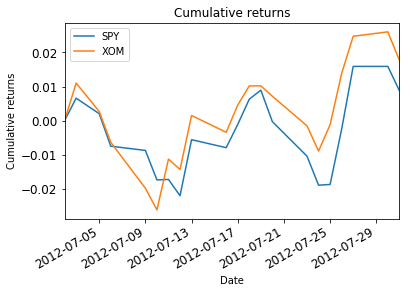

In [5]:
# Read data
dates = pd.date_range('2012-07-01', '2012-07-31')  # one month only
symbols = ['SPY','XOM']
df = get_data(symbols, dates)

# Compute daily returns
cumulative_returns = compute_cumulative_returns(df)
plot_data(cumulative_returns, title="Cumulative returns", y_label="Cumulative returns")